In [64]:
import pandas as pd 
import numpy as np

In [65]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# 1. Exploratory Data Analysis

In [66]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [67]:
lenght = df.shape[0]
print(lenght)
df.isnull().sum()

23486


Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Since we have to do Sentiment analysis on Feedback(E-Commerce Reviews), We jut need column Review Text and Rating. I'm dropping only that rows that have *NAN in column Review Text.* also dropping all the other columns that are not required here.

In [68]:
df_new = df[['Review Text', 'Rating']]
df_new = df_new.dropna(subset=['Review Text'])

In [69]:
print(df_new.head())
print(df_new.shape[0])
print(df_new.isnull().sum())

                                         Review Text  Rating
0  Absolutely wonderful - silky and sexy and comf...       4
1  Love this dress!  it's sooo pretty.  i happene...       5
2  I had such high hopes for this dress and reall...       3
3  I love, love, love this jumpsuit. it's fun, fl...       5
4  This shirt is very flattering to all due to th...       5
22641
Review Text    0
Rating         0
dtype: int64


In [70]:
print("Rating Distribution: ")
df_new['Rating'].value_counts().sort_index()

Rating Distribution: 


Rating
1      821
2     1549
3     2823
4     4908
5    12540
Name: count, dtype: int64

In [71]:
df_new['Total_Char_Count'] = df_new['Review Text'].apply(lambda x: sum(len(word) for word in x.split()) if x else 0)
df_new['word_count'] = df_new['Review Text'].apply(lambda x: len(x.split()) if x else 0)
print(df_new.head())
avg_word_count = df_new['word_count'].mean()
avg_char_count = df_new['Total_Char_Count'].mean()
print(f"avg char count and word count is: {avg_char_count}, {avg_word_count} ")


                                         Review Text  Rating  \
0  Absolutely wonderful - silky and sexy and comf...       4   
1  Love this dress!  it's sooo pretty.  i happene...       5   
2  I had such high hopes for this dress and reall...       3   
3  I love, love, love this jumpsuit. it's fun, fl...       5   
4  This shirt is very flattering to all due to th...       5   

   Total_Char_Count  word_count  
0                46           8  
1               237          62  
2               403          98  
3               103          22  
4               157          36  
avg char count and word count is: 249.12150523386777, 60.19667859193498 


# Sentiment Analysis 

## 1. Using Rating

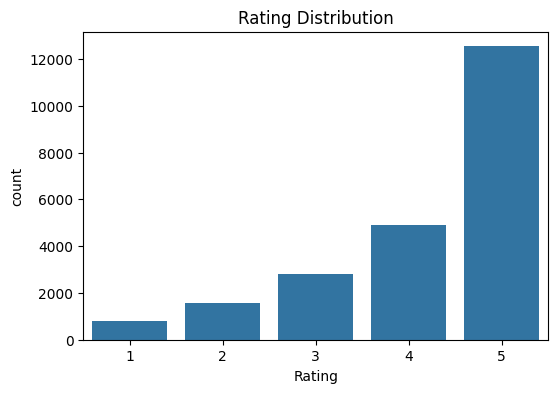

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns   

plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df_new, order=sorted(df_new['Rating'].unique()))
plt.title("Rating Distribution")
plt.show()

In [73]:
def rating_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'
    else:
        return 'unknown'

In [74]:
df_new['Rating_Sentiment'] = df_new['Rating'].apply(rating_sentiment)
df_new.head()

,Review Text,Rating,Total_Char_Count,word_count,Rating_Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,46,8,positive
1,Love this dress! it's sooo pretty. i happene...,5,237,62,positive
2,I had such high hopes for this dress and reall...,3,403,98,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",5,103,22,positive
4,This shirt is very flattering to all due to th...,5,157,36,positive


In [75]:
print(df_new['Rating_Sentiment'].value_counts())

Rating_Sentiment
positive    17448
neutral      2823
negative     2370
Name: count, dtype: int64


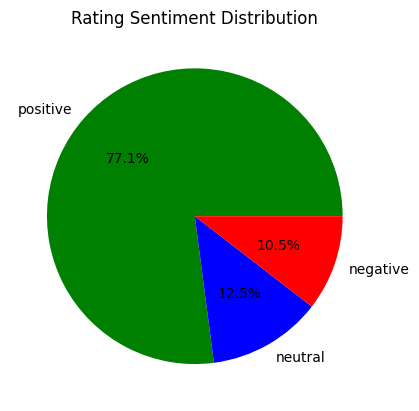

In [76]:
plt.pie(df_new['Rating_Sentiment'].value_counts(), labels=df_new['Rating_Sentiment'].value_counts().index, autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title("Rating Sentiment Distribution") 
plt.show()

## 2. Using VADER

### Prepocessing the DATA

In [77]:
import nltk
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [78]:
def preprocess_text(text):

    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    return text

df_new['preprocess_text'] = df_new['Review Text'].apply(preprocess_text)

for i in range(2):
    print(f"\nOriginal: {df_new['Review Text'].iloc[i][:100]}...")
    print(f"Cleaned:  {df_new['preprocess_text'].iloc[i][:100]}...")


Original: Absolutely wonderful - silky and sexy and comfortable...
Cleaned:  absolutely wonderful silky and sexy and comfortable...

Original: Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never...
Cleaned:  love this dress its sooo pretty i happened to find it in a store and im glad i did bc i never would ...


In [79]:
%%time
vader_model = SentimentIntensityAnalyzer()
df_new["vader_scores"] = df_new["preprocess_text"].apply(
    lambda text: vader_model.polarity_scores(text)
)
print(f"Number of rows: {len(df_new)}")

Number of rows: 22641
CPU times: total: 18.9 s
Wall time: 19.3 s


In [84]:
df_new["vader_polarity"] = df_new["vader_scores"].apply(
    lambda score_dict: score_dict["compound"]
)

df_new["vader_sentiment"] = pd.cut(
    df_new["vader_polarity"],
    bins=[-1.0, -0.25, 0.25, 1.0],
    labels=["Negative", "Neutral", "Positive"],
)


In [89]:
df_new['vader_sentiment'].value_counts()

vader_sentiment
Positive    20332
Neutral      1297
Negative     1012
Name: count, dtype: int64

In [94]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax
import torch

In [93]:
model_path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_path)
config = AutoConfig.from_pretrained(model_path)
roberta_model = AutoModelForSequenceClassification.from_pretrained(model_path)

def roberta_sentiment_analyzer(text, model):

    encoded_input = tokenizer(text, return_tensors="pt")
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = np.round(softmax(scores), 2)
    scores_dict = {"neg": scores[0], "neu": scores[1], "pos": scores[2]}
    return scores_dict

C:\Users\aksha\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aksha\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


KeyboardInterrupt: 

In [ ]:
%%time
# apply the roberta function
df["probabilities"] = df["roberta_content"].apply(
    sentiment_analyzer, model=roberta_model
)

In [ ]:
# now calculate the polarity for each text by:
# first multiplying each probability to its weights (-1=> negative, 0=>neutral and +1=>positive)
# then sum the values and pass through Tanh function to scale values from -1 up to +1
# finally we can assign labels for each text, depending on the polarity, e.g. -1.0 until -0.25 negavite
polarity_weights = torch.tensor([-1, 0, 1])
probs = torch.tensor(df[["neg", "neu", "pos"]].values)
polarity = polarity_weights * probs
polarity = polarity.sum(dim=-1)
polarity_scaled = nn.Tanh()(polarity)
df["roberta_polarity"] = polarity_scaled.numpy()
df["roberta_sentiment"] = pd.cut(
    df["roberta_polarity"],
    bins=[-1.0, -0.25, 0.25, 1.0],
    labels=["Negative", "Neutral", "Positive"],
)
df = df.drop(["neu", "neg", "pos"], axis=1)
df.head()